In [22]:
import pandas as pd
import numpy as np


def behav_correlation(subject_behav, scatter_data, cog_score_label, corr_label):
    scatter_data = scatter_data.loc[scatter_data['feature'] == 'Multi-modal']

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
    subject_behav['age gap'] = subject_behav['brain age'] - subject_behav['chronological age']
    # print(subject_behav_ridge[0:5])
    print(subject_behav.shape)
    
    # pd.DataFrame.corr() is nan compatible:
    corr_mat = subject_behav[corr_label + cog_score_label].corr()
    return((corr_mat.iloc[0, 1:]))
    
# reading behavioral scores:
#subject_behav = pd.read_csv("data/result01_pnc_data.csv", delimiter = ",")
# read file with FA components:
subject_behav = pd.read_csv("data/pnc_cognitive_response.csv", delimiter = ",")
#subject_behav = pd.read_csv("data/result01_pnc_data_merge.csv", delimiter = ",")
# print("subject_behav:")
# print(subject_behav[0:5])

#print(subject_info_behav[subject_info_behav.duplicated(subset = "SUBJID", keep = False)])

# accuracy_col = [
#     "ABF_A_ar_z", "ATT_A_ar_z", "WM_A_ar_z", 
#     "VMEM_A_ar_z", "FMEM_A_ar_z", "SMEM_A_ar_z", 
#     "LAN_A_ar_z", "NVR_A_ar_z", "SPA_A_ar_z", 
#     "EID_A_ar_z", "EDI_A_ar_z", "ADI_A_ar_z"]

# speed_col = [
#     "ABF_S_ar_z", "ATT_S_ar_z", "WM_S_ar_z", 
#     "VMEM_S_ar_z", "FMEM_S_ar_z", "SMEM_S_ar_z", 
#     "LAN_S_ar_z", "NVR_S_ar_z", "SPA_S_ar_z", 
#     "EID_S_ar_z", "EDI_S_ar_z", "ADI_S_ar_z", 
#     "MOT_S_ar_z", "SM_S_ar_z"]

# cog_score_label = accuracy_col + speed_col


cog_label_acc = [
    # executive control:
    "pcet_acc2",
    "pcpt_t_tp",
    "lnb_tp2",
    # episodic memory task:
    "pwmt_kiwrd_tot",
    "pfmt_ifac_tot",
    "volt_svt",
    # complex cognitive task:
    "pvrt_cr",
    "pmat_cr",
    "plot_tc",
    # social cognition task:
    "peit_cr",
    "pedt_a",
    "padt_a"
]

cog_label_speed = [
    # executive control:
    "pcet_rtcr",
    "pcpt_t_tprt",
    "lnb_rtc2",
    # episodic memory task:
    "pwmt_kiwrd_rtc",
    "pfmt_ifac_rtc",
    "volt_svtcrt",
    # complex cognitive task:
    "pvrt_rtcr",
    "pmat_rtcr",
    "plot_tcrt",
    # social cognition task:
    "peit_crt",
    "pedt_t",
    "padt_t",
    # sensorimotor speed task:
    "mp_mp2rtcr",
    "tap_tot"
]

cog_label_acc2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI"
]

cog_label_speed2 = [
    # executive control:
    "ABF",
    "ATT",
    "WM",
    # episodic memory task:
    "VMEM",
    "FMEM",
    "SMEM",
    # complex cognitive task:
    "LAN",
    "NVR",
    "SPA",
    # social cognition task:
    "EID",
    "EDI",
    "ADI",
    # sensorimotor speed task:
    "MOT",
    "SM"
]

cog_label = cog_label_acc + cog_label_speed
cog_label2 = [s + '_Accuracy' for s in cog_label_acc2] + [s + '_Speed' for s in cog_label_speed2]

#print(subject_info_behav[["mp_mp2rtcr", "tap_tot"]])
# revert the speed cognitive scores:
subject_behav[cog_label_speed] = subject_behav[cog_label_speed]*(-1)

# scatter_ridge = pd.read_csv("result/allsubjects/scatter_data_ridge.csv", delimiter = ",")
# scatter_svr = pd.read_csv("result/allsubjects/scatter_data_svr.csv", delimiter = ",")
# scatter_gpr = pd.read_csv("result/allsubjects/scatter_data_gpr.csv", delimiter = ",")
# scatter_dnn = pd.read_csv("result/allsubjects/scatter_data_dnn.csv", delimiter = ",")

scatter_ridge = pd.read_csv("result/allsubjects/out02_scatter_data_gender_ridge.csv", delimiter = ",")
scatter_svr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_svr.csv", delimiter = ",")
scatter_gpr = pd.read_csv("result/allsubjects/out02_scatter_data_gender_gpr.csv", delimiter = ",")
scatter_dnn = pd.read_csv("result/allsubjects/out02_scatter_data_gender_dnn.csv", delimiter = ",")


In [23]:
scatter_ridge.head()

,feature,SUBJID,CV,chronological age,brain age,Sex,brain age fit sex,brain age fit intersex,brain age fit
0,ALFF,601249791321,7,9.0,10.461285,F,11.000625,11.141371,10.813930
1,ALFF,601155992510,8,16.0,14.264945,M,15.213962,15.266611,15.429108
2,ALFF,606939668352,6,18.0,13.891279,F,16.318838,16.043166,16.159106
3,ALFF,609025109832,5,21.0,16.289315,F,16.900463,16.030567,16.763582
4,ALFF,608414632504,1,10.0,10.395401,M,11.469968,11.256257,11.669449


In [24]:
brainage_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
corr_label = ['brain age']

brainage_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, corr_label)
brainage_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_acc, corr_label)
brainage_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_acc, corr_label)
brainage_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_acc, corr_label)
brainage_behavacc_corr['Chronological age'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, ['chronological age'])

brainage_behavacc_corr.index = cog_label_acc2
print(brainage_behavacc_corr)


(604, 161)
(604, 161)
(604, 161)
(604, 162)
(604, 161)
         ridge       SVR       GPR       DNN  Chronological age
ABF   0.072349  0.071276  0.073132  0.072415           0.120046
ATT   0.335609  0.337682  0.344445  0.331074           0.384497
WM    0.232089  0.228257  0.235385  0.213889           0.263263
VMEM  0.142302  0.127840  0.140337  0.134206           0.149085
FMEM  0.250740  0.244328  0.251349  0.235122           0.271104
SMEM  0.046682  0.059323  0.053020  0.040789           0.075854
LAN   0.332158  0.328991  0.340658  0.328402           0.414871
NVR   0.205713  0.206321  0.209044  0.197691           0.254652
SPA   0.216123  0.202239  0.219401  0.204024           0.238525
EID   0.141544  0.146661  0.145432  0.138095           0.167332
EDI   0.441612  0.451600  0.450175  0.458182           0.567695
ADI   0.468574  0.468882  0.474263  0.479984           0.579598


In [25]:
# import seaborn as sns; sns.set(style="ticks", color_codes=True)

# scatter_data = scatter_ridge.loc[scatter_ridge['feature'] == 'Multi-modal']
# # merge behave file and subject info:
# subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
# print(subject_behav)
# # make scatter plot
# scatter_data = pd.melt(subject_behav, id_vars = ["SUBJID"],
#                       value_vars = ['brain age', 'chronological age'], var_name = 'age type', value_name = 'age')
# print(scatter_data)

# # g = sns.FacetGrid(scatter_data, hue =  row="")
# # g = g.map(plt.hist, "total_bill")

Text(0.5,1,'Brain age/Chronological age')

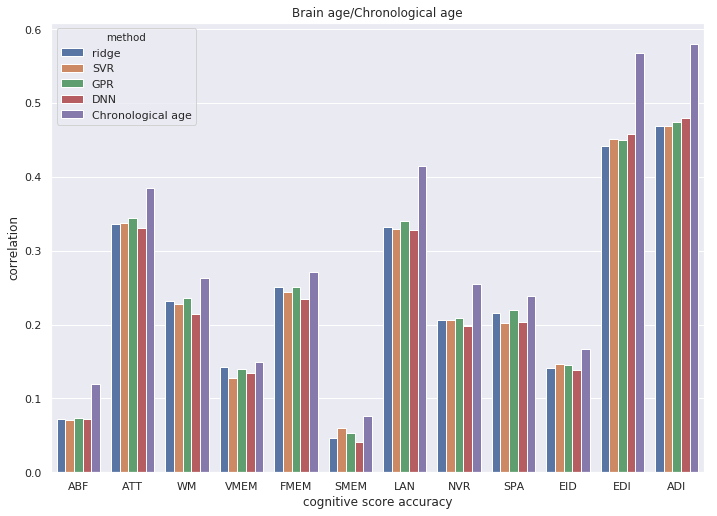

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = brainage_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Brain age/Chronological age")

(604, 161)
(604, 161)
(604, 161)
(604, 162)
(604, 161)
         ridge       SVR       GPR       DNN  Chronological age
ABF   0.116392  0.114688  0.116968  0.117261           0.120046
ATT   0.389809  0.388903  0.390108  0.390054           0.384497
WM    0.272095  0.269217  0.272319  0.270863           0.263263
VMEM  0.165495  0.164733  0.164879  0.162721           0.149085
FMEM  0.283035  0.280572  0.283042  0.281294           0.271104
SMEM  0.076397  0.074899  0.076660  0.076315           0.075854
LAN   0.422010  0.417886  0.422678  0.421457           0.414871
NVR   0.245103  0.243527  0.246150  0.247648           0.254652
SPA   0.262107  0.254707  0.262097  0.257118           0.238525
EID   0.168724  0.169337  0.168770  0.169186           0.167332
EDI   0.501896  0.513353  0.504674  0.518867           0.567695
ADI   0.518706  0.529887  0.521262  0.534704           0.579598


Text(0.5,1,'Brain age fit/Chronological age')

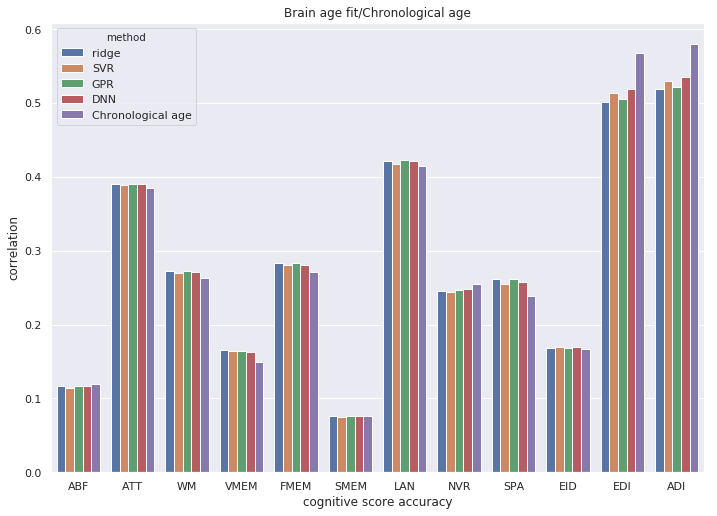

In [27]:
brainage_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
#corr_label = ['brain age fit']
corr_label = ['brain age fit sex']

brainage_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, corr_label)
brainage_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_acc, corr_label)
brainage_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_acc, corr_label)
brainage_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_acc, corr_label)
brainage_behavacc_corr['Chronological age'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, ['chronological age'])

brainage_behavacc_corr.index = cog_label_acc2
print(brainage_behavacc_corr)

import seaborn as sns
import matplotlib.pyplot as plt

plot_data = brainage_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Brain age fit/Chronological age")

(604, 161)
(604, 161)
(604, 161)
(604, 162)
(604, 161)
         ridge       SVR       GPR       DNN  Chronological age
ABF   0.061554  0.058229  0.061288  0.058419           0.047534
ATT   0.578771  0.573437  0.578656  0.574567           0.551394
WM    0.256509  0.252401  0.256561  0.253880           0.242027
VMEM  0.456364  0.452055  0.455678  0.450873           0.423903
FMEM  0.221157  0.218903  0.220564  0.217466           0.200402
SMEM  0.225572  0.220210  0.224412  0.217850           0.187167
LAN   0.276119  0.271977  0.275449  0.270897           0.248270
NVR  -0.067373 -0.069342 -0.068808 -0.073695          -0.096173
SPA  -0.102437 -0.108096 -0.103460 -0.109666          -0.131813
EID   0.323627  0.320218  0.322452  0.317065           0.287524
EDI   0.147087  0.146876  0.146815  0.145900           0.138516
ADI   0.120214  0.121277  0.120119  0.120493           0.118414
MOT   0.251645  0.247813  0.251831  0.249670           0.240325
SM   -0.564914 -0.560562 -0.565894 -0.565236     

Text(0.5,1,'Brain age fit/Chronological age')

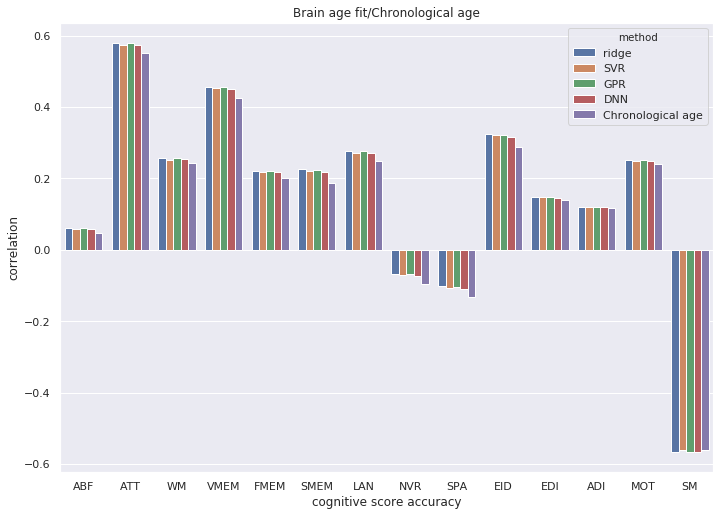

In [28]:
brainage_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
#corr_label = ['brain age fit']
corr_label = ['brain age fit sex']
corr_label2 = cog_label_speed
corr_label_name = cog_label_speed2

brainage_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, corr_label2, corr_label)
brainage_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, corr_label2, corr_label)
brainage_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, corr_label2, corr_label)
brainage_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, corr_label2, corr_label)
brainage_behavacc_corr['Chronological age'] = behav_correlation(subject_behav, scatter_ridge, corr_label2, ['chronological age'])

brainage_behavacc_corr.index = corr_label_name
print(brainage_behavacc_corr)

import seaborn as sns
import matplotlib.pyplot as plt

plot_data = brainage_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Brain age fit/Chronological age")

In [29]:
age_gap_behavacc_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap']

age_gap_behavacc_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_acc, corr_label)
age_gap_behavacc_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_acc, corr_label)
age_gap_behavacc_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_acc, corr_label)
age_gap_behavacc_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_acc, corr_label)

age_gap_behavacc_corr.index = cog_label_acc2
print(age_gap_behavacc_corr)


(604, 161)
(604, 161)
(604, 161)
(604, 162)
         ridge       SVR       GPR       DNN
ABF  -0.108675 -0.119829 -0.109025 -0.106142
ATT  -0.186513 -0.231544 -0.170886 -0.179423
WM   -0.124163 -0.162528 -0.117736 -0.144114
VMEM -0.053375 -0.094082 -0.055420 -0.060280
FMEM -0.109634 -0.154555 -0.107032 -0.124092
SMEM -0.067308 -0.055859 -0.057999 -0.075271
LAN  -0.248185 -0.299180 -0.235067 -0.240848
NVR  -0.149480 -0.177519 -0.144377 -0.154138
SPA  -0.103399 -0.152750 -0.096972 -0.112960
EID  -0.088467 -0.100928 -0.081893 -0.087658
EDI  -0.358759 -0.406535 -0.346495 -0.314159
ADI  -0.340222 -0.404666 -0.331519 -0.302759


Text(0.5,1,'Age gap')

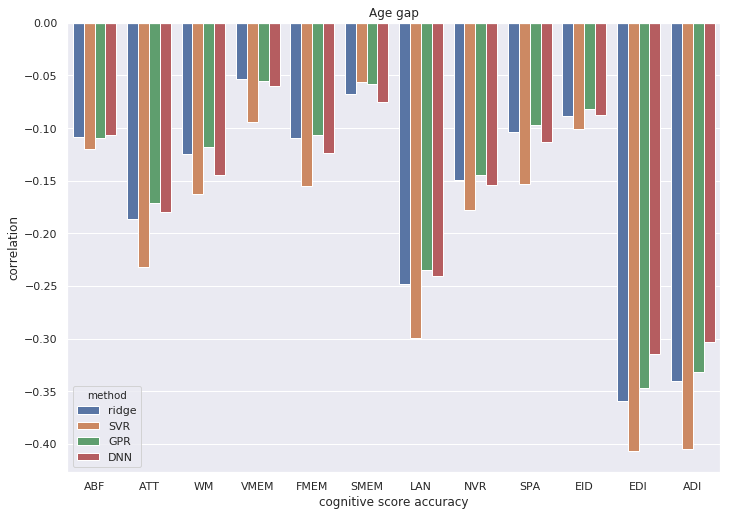

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavacc_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score accuracy', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score accuracy", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap")

In [31]:
brainage_behavspeed_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
corr_label = ['brain age']

brainage_behavspeed_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_speed, corr_label)
brainage_behavspeed_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_speed, corr_label)
brainage_behavspeed_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_speed, corr_label)
brainage_behavspeed_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_speed, corr_label)
brainage_behavspeed_corr['Chronological age'] = behav_correlation(subject_behav, scatter_dnn, cog_label_speed, ['chronological age'])

brainage_behavspeed_corr.index = cog_label_speed2
print(brainage_behavspeed_corr)


(604, 161)
(604, 161)
(604, 161)
(604, 162)
(604, 162)
         ridge       SVR       GPR       DNN  Chronological age
ABF   0.020458  0.032408  0.023850  0.021237           0.047534
ATT   0.511884  0.503684  0.517010  0.509979           0.551394
WM    0.254592  0.246429  0.255031  0.239110           0.242027
VMEM  0.398063  0.391603  0.401728  0.384497           0.423903
FMEM  0.217081  0.226790  0.221839  0.207316           0.200402
SMEM  0.220030  0.229090  0.224490  0.215755           0.187167
LAN   0.251321  0.251789  0.257422  0.244130           0.248270
NVR  -0.035734 -0.054500 -0.034619 -0.050647          -0.096173
SPA  -0.099192 -0.082391 -0.099342 -0.098828          -0.131813
EID   0.277994  0.278668  0.277088  0.267246           0.287524
EDI   0.147715  0.139445  0.144271  0.148887           0.138516
ADI   0.106567  0.106332  0.105030  0.106887           0.118414
MOT   0.207694  0.211385  0.212700  0.204921           0.240325
SM   -0.519160 -0.510498 -0.521579 -0.517890     

Text(0.5,1,'Brain age/Chronological age')

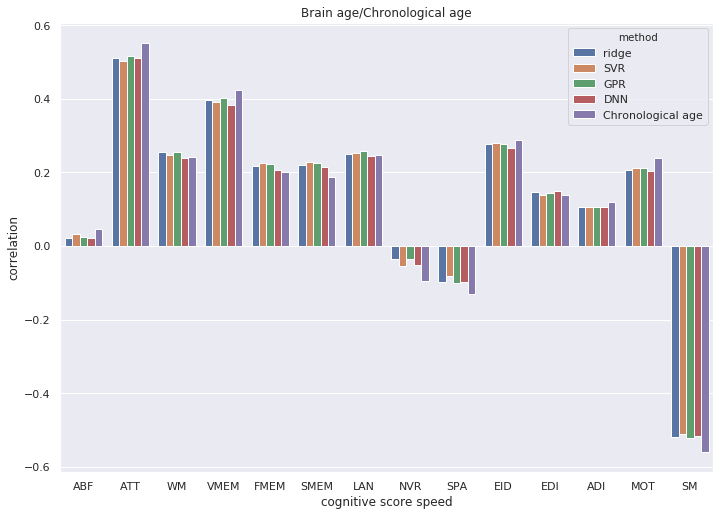

In [32]:
import seaborn as sns

plot_data = brainage_behavspeed_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score speed', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score speed", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(cog_label_speed2, rotation=0)
plt.title("Brain age/Chronological age")

In [33]:
age_gap_behavspeed_corr = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
corr_label = ['age gap']

age_gap_behavspeed_corr['ridge'] = behav_correlation(subject_behav, scatter_ridge, cog_label_speed, corr_label)
age_gap_behavspeed_corr['SVR'] = behav_correlation(subject_behav, scatter_svr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['GPR'] = behav_correlation(subject_behav, scatter_gpr, cog_label_speed, corr_label)
age_gap_behavspeed_corr['DNN'] = behav_correlation(subject_behav, scatter_dnn, cog_label_speed, corr_label)

age_gap_behavspeed_corr.index = cog_label_speed2
print(age_gap_behavspeed_corr)


(604, 161)
(604, 161)
(604, 161)
(604, 162)
         ridge       SVR       GPR       DNN
ABF  -0.055805 -0.041596 -0.051446 -0.054094
ATT  -0.219603 -0.304887 -0.207610 -0.200076
WM   -0.049002 -0.097511 -0.044824 -0.062429
VMEM -0.162000 -0.228266 -0.153208 -0.166697
FMEM -0.031516 -0.049745 -0.020701 -0.037360
SMEM -0.002420 -0.022332  0.008729  0.000995
LAN  -0.066492 -0.102360 -0.053840 -0.066908
NVR   0.122270  0.099799  0.126681  0.097339
SPA   0.088622  0.125050  0.088839  0.084581
EID  -0.097805 -0.136158 -0.096698 -0.102007
EDI  -0.025198 -0.058291 -0.028747 -0.016468
ADI  -0.052660 -0.068009 -0.054592 -0.047588
MOT  -0.119820 -0.144274 -0.111018 -0.115418
SM    0.223765  0.310900  0.216503  0.203694


Text(0.5,1,'Age gap')

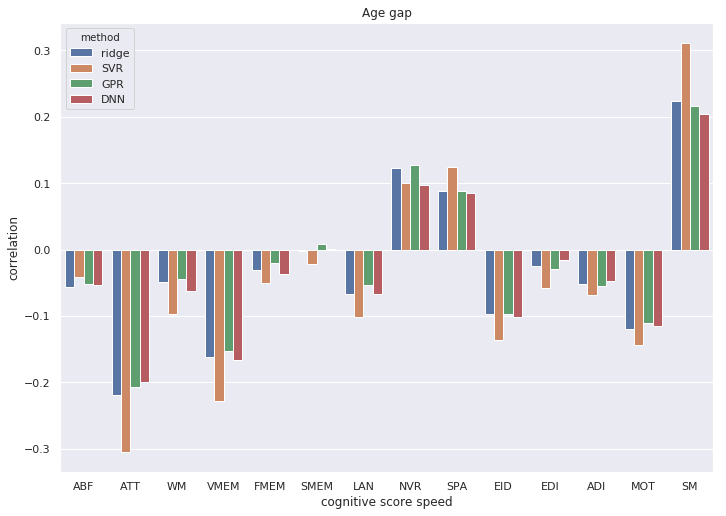

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_data = age_gap_behavspeed_corr.reset_index()
plot_data = pd.melt(plot_data, id_vars=['index'], var_name = 'method', value_name = 'correlation')
plot_data.columns = ['cognitive score speed', 'method', 'correlation']
# print(plot_data)

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = "cognitive score speed", y = "correlation", hue = 'method', data = plot_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Age gap")

In [48]:
save_columns = ["SUBJID", 'Sex', 'chronological age', 'age gap', 'age gap corr', 
                'age gap corr sex', 'age gap corr intersex', 'brain age', 
                'brain age fit', 'brain age fit sex', 'brain age fit intersex']


def linear_regression_rfe(subject_behav, scatter_data, cog_score_label, y_label, n_features = 5, save_data = False):
    from sklearn.feature_selection import RFECV
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LinearRegression
    
    from sklearn import preprocessing
    
    scatter_data = scatter_data.loc[scatter_data['feature'] == 'Multi-modal']

    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = ["SUBJID", 'Sex'])
    subject_behav['age gap'] = subject_behav['brain age'] - subject_behav['chronological age']
    subject_behav['age gap corr'] = subject_behav['brain age'] - subject_behav['brain age fit']
    subject_behav['age gap corr sex'] = subject_behav['brain age'] - subject_behav['brain age fit sex']
    subject_behav['age gap corr intersex'] = subject_behav['brain age'] - subject_behav['brain age fit intersex']
    
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    
    subject_behav_tosave = subject_behav[save_columns + cog_score_label]
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['chronological age']
    else:
        cog_score_label = cog_score_label
        
    X_label = cog_score_label + ["Sex"]
    #X_label = cog_score_label
    
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    X = subject_behav[X_label].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    #selector = RFECV(estimator, step=1, cv=5,  min_features_to_select=5)
    selector = RFECV(estimator, step=1, cv=5)
    #selector = RFE(estimator, step=1, n_features_to_select=n_features)
    
    selector = selector.fit(X_scaled, y)
    
    #print(selector.support_)
    #print(selector.ranking_)

    coefs = selector.estimator_.coef_
#     print(coefs)
    index = selector.support_
    label = [X_label[i] for i in range(len(X_label)) if index[i]]
#     print(label)
    
    rsquared = selector.score(X_scaled, y)
    p = len(index)
    n = np.size(X, 0)
    adjrsquared = 1 - (1 - rsquared) * (n-1)/(n-p-1)
    
    
    coefs = pd.DataFrame(coefs, index = label, columns = ['beta'])
    
    if save_data:
        return((coefs, adjrsquared, subject_behav_tosave))
    else:
        return((coefs, adjrsquared))

def linear_regression(subject_behav, scatter_data, cog_score_label, y_label):
    from sklearn.linear_model import LinearRegression
    from sklearn import preprocessing
    
    scatter_data = scatter_data.loc[scatter_data['feature'] == 'Multi-modal']
    
    # merge behave file and subject info:
    subject_behav = subject_behav.merge(scatter_data, how = "inner", on = "SUBJID")
    subject_behav['age gap'] = subject_behav['brain age'] - subject_behav['chronological age']
    subject_behav.replace({'Sex': {'F': 0, 'M': 1}}, inplace = True)
    
    # print(any(np.isnan(y)))
    # print(any(np.isnan(X)))
    
    if y_label == 'age gap':
        print('add chronological age as predictors...')
        cog_score_label = cog_score_label + ['chronological age']
    else:
        cog_score_label = cog_score_label
        
    X = subject_behav[cog_score_label + ["Sex"]].values
    y = subject_behav[y_label].values

    nan_idx = np.isnan(X).any(axis=1)
    y = y[~nan_idx]
    X = X[~nan_idx,:]
    X_scaled = preprocessing.scale(X)

    estimator = LinearRegression()
    estimator = estimator.fit(X_scaled, y)

    coefs = estimator_.coef_
    
    rsquared = selector.score(X_scaled, y)
    coefs = pd.DataFrame(coefs, index = cog_score_label, columns = ['beta'])
    return((coefs, rsquared))

In [51]:
brainage_behav_rsquare = pd.DataFrame(index = ['adjrsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
brainage_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

#y_label = 'brain age fit intersex'
y_label = 'brain age fit'

coefs_ridge, brainage_behav_rsquare.loc['adjrsquared','ridge'], \
subject_behav_ridge = linear_regression_rfe(subject_behav, 
                                             scatter_ridge, 
                                             cog_label, 
                                             y_label = y_label,
                                             save_data = True)

subject_behav_ridge.columns = save_columns + cog_label2
subject_behav_ridge.to_csv('result/allsubjects/out03_subject_behav_ridge.csv', index = False)

coefs_svr, brainage_behav_rsquare.loc['adjrsquared','SVR'], \
    subject_behav_svr = linear_regression_rfe(subject_behav, 
                                           scatter_svr, 
                                           cog_label, 
                                           y_label = y_label, 
                                           save_data = True)
subject_behav_svr.columns = save_columns + cog_label2
subject_behav_svr.to_csv('result/allsubjects/out03_subject_behav_svr.csv', index = False)

coefs_gpr, brainage_behav_rsquare.loc['adjrsquared','GPR'], \
subject_behav_gpr = linear_regression_rfe(subject_behav, 
                                           scatter_gpr, 
                                           cog_label, 
                                           y_label = y_label, 
                                           save_data = True)

subject_behav_gpr.columns = save_columns + cog_label2
subject_behav_gpr.to_csv('result/allsubjects/out03_subject_behav_gpr.csv', index = False)

coefs_dnn, brainage_behav_rsquare.loc['adjrsquared','DNN'], \
subject_behav_dnn = linear_regression_rfe(subject_behav, 
                                           scatter_dnn, 
                                           cog_label, 
                                           y_label = y_label,
                                           save_data = True)

subject_behav_dnn.columns = save_columns + cog_label2
subject_behav_dnn.to_csv('result/allsubjects/out03_subject_behav_dnn.csv', index = False)

coefs_chro, brainage_behav_rsquare.loc['adjrsquared','Chronological age'], \
subject_behav_dnn = linear_regression_rfe(subject_behav, 
                                          scatter_dnn, 
                                          cog_label, 
                                          y_label = 'chronological age', 
                                          save_data = True)

brainage_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], 
                                keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])


brainage_behav_coef = brainage_behav_coef
brainage_behav_rsquare = brainage_behav_rsquare
print(brainage_behav_coef)
print(brainage_behav_rsquare)

                                      beta
ridge             pcet_acc2      -0.111631
                  pcpt_t_tp       0.232903
                  pwmt_kiwrd_tot -0.124262
                  pvrt_cr         0.328255
                  pmat_cr        -0.090311
                  plot_tc         0.180437
                  pedt_a          0.205842
                  padt_a          0.535609
                  pcet_rtcr      -0.042484
                  pcpt_t_tprt     0.656765
                  pwmt_kiwrd_rtc  0.329985
                  pfmt_ifac_rtc  -0.173628
                  volt_svtcrt     0.237676
                  pmat_rtcr      -0.118760
                  pedt_t         -0.050710
                  padt_t         -0.094525
                  mp_mp2rtcr     -0.091085
                  tap_tot        -0.548024
                  Sex            -0.259891
SVR               pcpt_t_tp       0.247537
                  pvrt_cr         0.286846
                  padt_a          0.636507
           

Text(0.5, 1.0, 'Brain age')

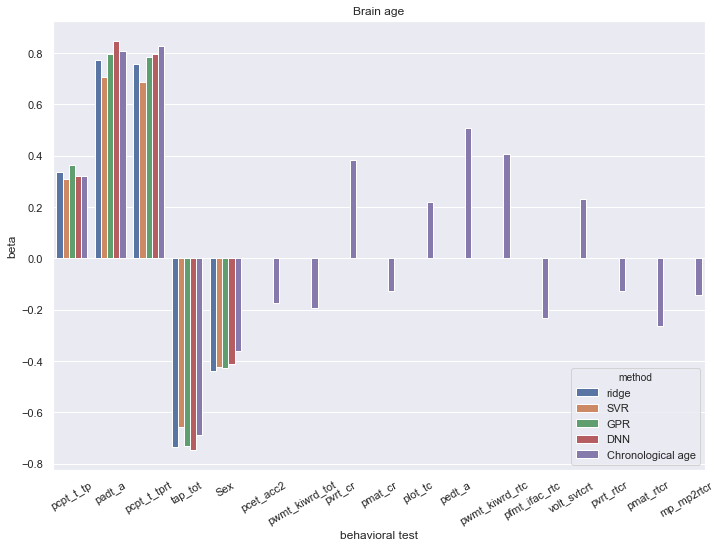

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

age_gap_behav_coef = brainage_behav_coef.drop(index='chronological age', level = 1)
age_gap_behav_coef.index.names = ['method', 'behavioral test']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age")

In [14]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'age gap')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'age gap')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'age gap')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'age gap')



add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...


In [15]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], axis = 1, keys = ['ridge', 'SVR', 'GPR', 'DNN'], sort = False)
behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)
rows.insert(0, rows.pop(rows.index('chronological age')))
rows.insert(1, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv("result/allsubjects/agegap_behav_coef.csv")

                      ridge       SVR       GPR       DNN
chronological age -0.964448  -1.35877 -0.908353 -0.867239
Sex                     NaN -0.230413       NaN       NaN
ATT_Speed               NaN   0.10795       NaN       NaN
SMEM_Speed              NaN  0.145133       NaN       NaN
SM_Speed                NaN -0.159376       NaN       NaN
rsquared           0.293741  0.454633  0.274913  0.241729


Text(0.5, 1.0, 'Age gap')

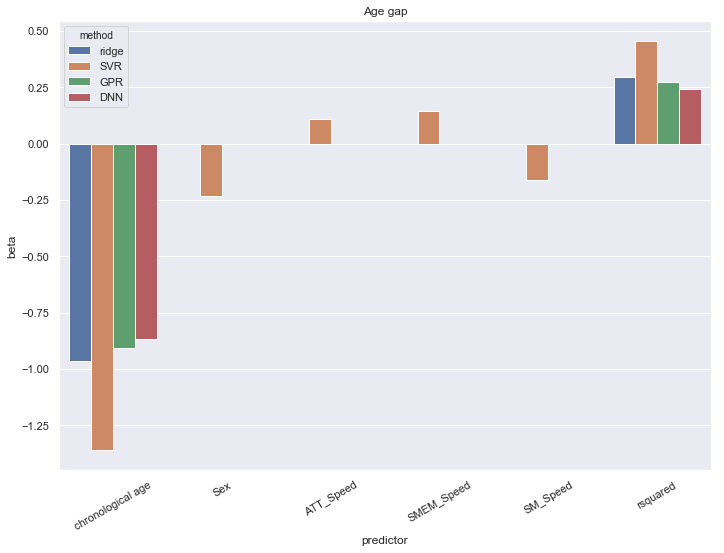

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# age_gap_behav_coef = agegap_behav_coef.drop(index='chronological age', level = 0)
# age_gap_behav_coef.index.names = ['method', 'behavioral test']

data_plot = agegap_behav_coef

data_plot.index.names = ['predictor']
data_plot = data_plot.reset_index()
data_plot = pd.melt(data_plot, id_vars = ['predictor'], var_name = 'method',
                    value_vars = ['ridge', 'SVR', 'GPR', 'DNN'], value_name = 'beta')

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'predictor', y = "beta", hue = 'method', data = data_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Age gap")

In [55]:
behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])
behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

# coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'brain age fit')
# coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'brain age fit')
# coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'brain age fit')
# coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'brain age fit')

coefs_ridge, behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label, y_label = 'brain age fit sex')
coefs_svr, behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label, y_label = 'brain age fit sex')
coefs_gpr, behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label, y_label = 'brain age fit sex')
coefs_dnn, behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'brain age fit sex')

coefs_chro, behav_rsquare.loc['rsquared','Chronological age'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label, y_label = 'chronological age')



In [56]:
behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], axis = 1, 
                       keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], sort = False)
behav_coef.columns =  behav_coef.columns.droplevel(1)

behav_coef = pd.concat([behav_coef, behav_rsquare], axis = 0)

agegap_behav_coef = behav_coef
d = dict(zip(cog_label, cog_label2))
agegap_behav_coef.rename(index = d, inplace = True)

rows = list(agegap_behav_coef.index)
rows.insert(0, rows.pop(rows.index('Sex')))

agegap_behav_coef = agegap_behav_coef.reindex(index= rows)


print(agegap_behav_coef)

agegap_behav_coef.to_csv("result/allsubjects/brainagefit_behav_coef.csv")

                   ridge       SVR        GPR       DNN Chronological age
Sex              -0.4418 -0.408677   -0.43718 -0.406574         -0.363136
ABF_Accuracy   -0.104735       NaN  -0.107136       NaN          -0.17272
ATT_Accuracy    0.228393   0.21894   0.233071  0.252666          0.321432
VMEM_Accuracy  -0.127566       NaN  -0.133044       NaN         -0.194617
SMEM_Accuracy -0.0487623       NaN -0.0491932       NaN               NaN
LAN_Accuracy    0.325849  0.267928   0.330843  0.304311          0.383421
NVR_Accuracy  -0.0806698       NaN -0.0814125       NaN         -0.128328
SPA_Accuracy     0.18054       NaN   0.181637       NaN          0.218533
EDI_Accuracy    0.263668       NaN   0.274375       NaN          0.509026
ADI_Accuracy    0.492563  0.641964    0.50524  0.745175          0.808549
ABF_Speed     -0.0654035       NaN -0.0670064       NaN               NaN
ATT_Speed       0.618736  0.565644   0.630757   0.64737          0.826954
VMEM_Speed      0.359826  0.170898   0

Text(0.5, 1.0, 'brain age fit')

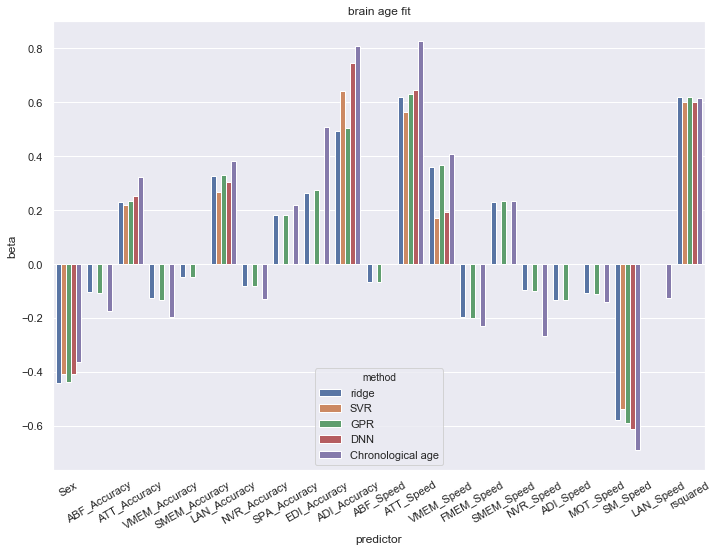

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# age_gap_behav_coef = agegap_behav_coef.drop(index='chronological age', level = 0)
# age_gap_behav_coef.index.names = ['method', 'behavioral test']

data_plot = agegap_behav_coef

data_plot.index.names = ['predictor']
data_plot = data_plot.reset_index()
data_plot = pd.melt(data_plot, id_vars = ['predictor'], var_name = 'method',
                    value_vars = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'], value_name = 'beta')

sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'predictor', y = "beta", hue = 'method', data = data_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("brain age fit")

In [19]:
brainage_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
brainage_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, brainage_behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label_acc, y_label = 'brain age')
coefs_svr, brainage_behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label_acc, y_label = 'brain age')
coefs_gpr, brainage_behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label_acc, y_label = 'brain age')
coefs_dnn, brainage_behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_acc, y_label = 'brain age')
coefs_chro, brainage_behav_rsquare.loc['rsquared','Chronological age'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_acc, y_label = 'chronological age')

brainage_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])


brainage_behav_coef_acc = brainage_behav_coef
brainage_behav_rsquare_acc = brainage_behav_rsquare
print(brainage_behav_coef_acc)
print(brainage_behav_rsquare_acc)

                                     beta
ridge             pcet_acc2     -0.270541
                  pcpt_t_tp      0.517901
                  pfmt_ifac_tot  0.225201
                  volt_svt      -0.258555
                  pvrt_cr        0.284750
                  plot_tc        0.422452
                  pedt_a         0.220208
                  padt_a         0.906198
                  Sex           -0.350699
SVR               pcpt_t_tp      0.473264
                  pvrt_cr        0.245358
                  plot_tc        0.279141
                  pedt_a         0.241920
                  padt_a         0.782556
                  Sex           -0.367167
GPR               pcet_acc2     -0.281368
                  pcpt_t_tp      0.542504
                  pfmt_ifac_tot  0.215929
                  volt_svt      -0.248721
                  pvrt_cr        0.307427
                  plot_tc        0.423097
                  pedt_a         0.259325
                  padt_a         0

Text(0.5, 1.0, 'Brain age')

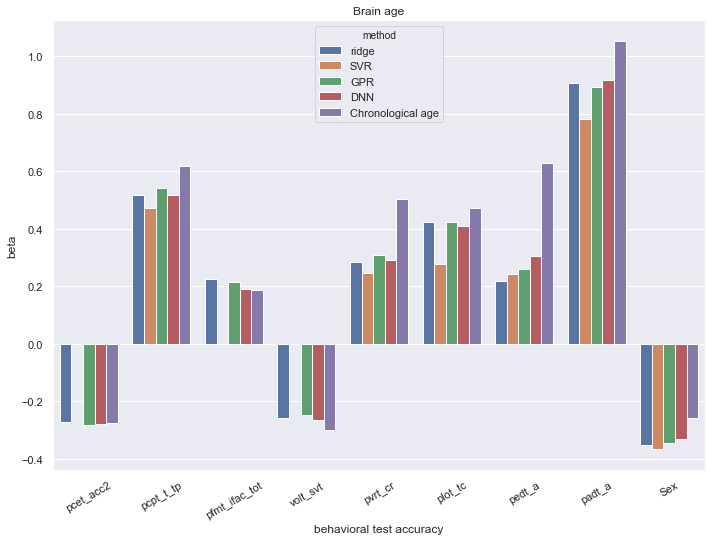

In [20]:
import seaborn as sns

age_gap_behav_coef = brainage_behav_coef_acc.drop(index='chronological age', level = 1)
age_gap_behav_coef.index.names = ['method', 'behavioral test accuracy']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test accuracy', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age")

In [23]:
age_gap_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
age_gap_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
y_label = "age gap"

coefs_ridge, age_gap_behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label_acc, y_label)
coefs_svr, age_gap_behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label_acc, y_label)
coefs_gpr, age_gap_behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label_acc, y_label)
coefs_dnn, age_gap_behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_acc, y_label)

age_gap_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], keys = ['ridge', 'SVR', 'GPR', 'DNN'])


age_gap_behav_coef_acc = age_gap_behav_coef
age_gap_behav_rsquare_acc = age_gap_behav_rsquare
print(age_gap_behav_coef_acc)
print(age_gap_behav_rsquare_acc)

add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
                             beta
ridge pedt_a            -0.236646
      padt_a             0.144671
      chronological age -0.908357
      Sex               -0.171264
SVR   chronological age -1.172706
      Sex               -0.191397
GPR   chronological age -0.895662
DNN   chronological age -0.865512
             ridge       SVR       GPR       DNN
rsquared  0.300474  0.431705  0.268671  0.241693


Text(0.5, 1.0, 'Age gap')

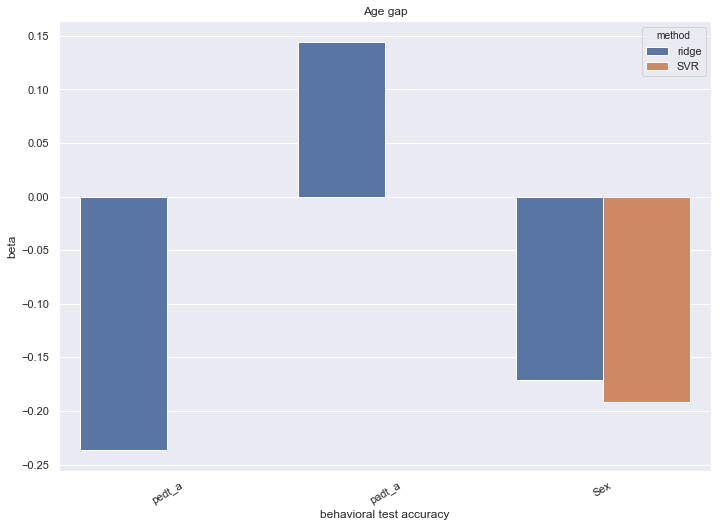

In [24]:
import seaborn as sns

age_gap_behav_coef = age_gap_behav_coef_acc.drop(index='chronological age', level = 1)
age_gap_behav_coef.index.names = ['method', 'behavioral test accuracy']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test accuracy', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Age gap")

In [26]:
brainage_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
brainage_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])

coefs_ridge, brainage_behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label_speed, y_label = 'brain age')
coefs_svr, brainage_behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label_speed, y_label = 'brain age')
coefs_gpr, brainage_behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label_speed, y_label = 'brain age')
coefs_dnn, brainage_behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_speed, y_label = 'brain age')
coefs_chro, brainage_behav_rsquare.loc['rsquared','Chronological age'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_speed, y_label = 'chronological age')

brainage_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn, coefs_chro], keys = ['ridge', 'SVR', 'GPR', 'DNN', 'Chronological age'])

brainage_behav_coef_speed = brainage_behav_coef
brainage_behav_rsquare_speed = brainage_behav_coef

print(brainage_behav_coef_speed)
print(brainage_behav_rsquare_speed)

                                      beta
ridge             pcpt_t_tprt     0.779364
                  pwmt_kiwrd_rtc  0.328968
                  plot_tcrt      -0.303693
                  tap_tot        -0.986866
                  Sex            -0.466564
SVR               pcpt_t_tprt     0.806181
                  tap_tot        -0.955975
                  Sex            -0.487691
GPR               pcpt_t_tprt     0.807706
                  pwmt_kiwrd_rtc  0.339885
                  plot_tcrt      -0.311056
                  tap_tot        -0.994288
                  Sex            -0.457333
DNN               pcpt_t_tprt     0.833036
                  pwmt_kiwrd_rtc  0.301855
                  plot_tcrt      -0.325365
                  tap_tot        -1.019103
                  Sex            -0.447145
Chronological age pcpt_t_tprt     1.001660
                  pwmt_kiwrd_rtc  0.438732
                  plot_tcrt      -0.483844
                  tap_tot        -1.223866
           

Text(0.5, 1.0, 'Brain age')

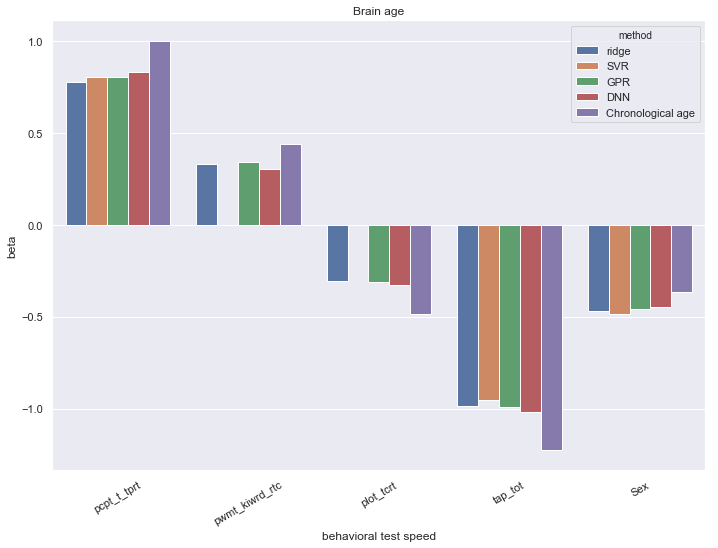

In [27]:
import seaborn as sns

age_gap_behav_coef = brainage_behav_coef_speed.drop(index='chronological age', level = 1)
#pd.MultiIndex.set_levels(age_gap_behav_coef, levels = cog_label_acc2, level = 1 , inplace = True)
age_gap_behav_coef.index.names = ['method', 'behavioral test speed']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test speed', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title("Brain age")

In [29]:
age_gap_behav_rsquare = pd.DataFrame(index = ['rsquared'], columns = ['ridge', 'SVR', 'GPR', 'DNN'])
age_gap_behav_coef = pd.DataFrame(columns = ['ridge', 'SVR', 'GPR', 'DNN'])
y_label = 'age gap'

coefs_ridge, age_gap_behav_rsquare.loc['rsquared','ridge'] = linear_regression_rfe(subject_behav, scatter_ridge, cog_label_speed, y_label)
coefs_svr, age_gap_behav_rsquare.loc['rsquared','SVR'] = linear_regression_rfe(subject_behav, scatter_svr, cog_label_speed, y_label)
coefs_gpr, age_gap_behav_rsquare.loc['rsquared','GPR'] = linear_regression_rfe(subject_behav, scatter_gpr, cog_label_speed, y_label)
coefs_dnn, age_gap_behav_rsquare.loc['rsquared','DNN'] = linear_regression_rfe(subject_behav, scatter_dnn, cog_label_speed, y_label)

age_gap_behav_coef = pd.concat([coefs_ridge, coefs_svr, coefs_gpr, coefs_dnn], keys = ['ridge', 'SVR', 'GPR', 'DNN'])

age_gap_behav_coef_speed = age_gap_behav_coef
age_gap_behav_rsquare_speed = age_gap_behav_rsquare

print(age_gap_behav_coef)
print(age_gap_behav_rsquare)

add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
add chronological age as predictors...
                             beta
ridge pcet_rtcr         -0.124114
      pcpt_t_tprt        0.085894
      lnb_rtc2           0.112160
      pwmt_kiwrd_rtc     0.023196
      pfmt_ifac_rtc      0.045352
      volt_svtcrt        0.127566
      pvrt_rtcr          0.072727
      pmat_rtcr          0.098858
      plot_tcrt         -0.021781
      peit_crt          -0.024900
      pedt_t             0.039818
      padt_t            -0.119660
      mp_mp2rtcr        -0.065802
      tap_tot           -0.216184
      chronological age -1.190200
      Sex               -0.217285
SVR   pcpt_t_tprt        0.107950
      volt_svtcrt        0.145133
      tap_tot           -0.159376
      chronological age -1.358773
      Sex               -0.230413
GPR   pcet_rtcr         -0.115861
      pcpt_t_tprt        0.097041
      lnb_rtc2           0.1

Text(0.5, 1.0, 'Brain Age Gap')

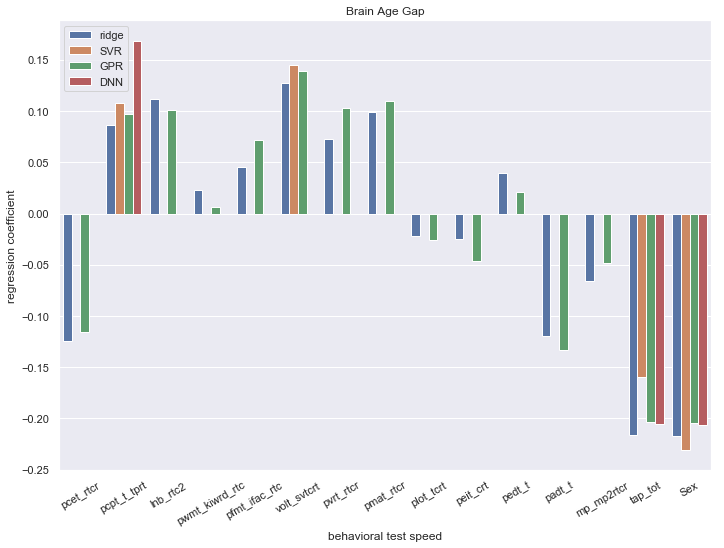

In [32]:
import seaborn as sns

age_gap_behav_coef = age_gap_behav_coef_speed.drop(index='chronological age', level = 1)
#pd.MultiIndex.set_levels(age_gap_behav_coef, levels = cog_label_acc2, level = 1 , inplace = True)
age_gap_behav_coef.index.names = ['method', 'behavioral test speed']
age_gap_behav_coef = age_gap_behav_coef.reset_index()


sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x = 'behavioral test speed', y = "beta", hue = 'method', data = age_gap_behav_coef)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
# ax.set_xticklabels(['ABF', 'ATT', 'FMEM', 'NVR', 'ADI', 'SM', 'SPA'], rotation=0)
ax.set_ylabel('regression coefficient')
plt.legend(loc='upper left')
plt.title("Brain Age Gap")